In [1]:
import bloqade.stim
import bloqade.tsim

import warnings

import cirq
import numpy as np
import matplotlib.pyplot as plt
import bloqade.cirq_utils as utils

from cirq.contrib.svg import SVGCircuit
from kirin.dialects.ilist import IList
from bloqade import squin, cirq_utils

from noiseless_kernel import noiseless

warnings.filterwarnings("ignore")

P = 0.05
@squin.kernel
def noiseless():
    q_data = squin.qalloc(7)
    # squin.u3(theta, phi, 0, q_data[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_data[i])

    # apply cz to pairs
    squin.cz(q_data[1], q_data[2])
    squin.cz(q_data[3], q_data[4])
    squin.cz(q_data[5], q_data[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_data[6])

    # apply cz to more pairs
    squin.cz(q_data[0], q_data[3])
    squin.cz(q_data[2], q_data[5])
    squin.cz(q_data[4], q_data[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_data[i])

    # apply MORE cz gates
    squin.cz(q_data[0], q_data[1])
    squin.cz(q_data[2], q_data[3])
    squin.cz(q_data[4], q_data[5])

    squin.sqrt_y(q_data[1])
    squin.sqrt_y(q_data[2])
    squin.sqrt_y(q_data[4])

    """
    Encode aux |+>
    """
    q_aux_1 = squin.qalloc(7)
    squin.h(q_aux_1[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_1[i])

    # apply cz to pairs
    squin.cz(q_aux_1[1], q_aux_1[2])
    squin.cz(q_aux_1[3], q_aux_1[4])
    squin.cz(q_aux_1[5], q_aux_1[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_1[6])

    # apply cz to more pairs
    squin.cz(q_aux_1[0], q_aux_1[3])
    squin.cz(q_aux_1[2], q_aux_1[5])
    squin.cz(q_aux_1[4], q_aux_1[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_1[i])

    # apply MORE cz gates
    squin.cz(q_aux_1[0], q_aux_1[1])
    squin.cz(q_aux_1[2], q_aux_1[3])
    squin.cz(q_aux_1[4], q_aux_1[5])

    squin.sqrt_y(q_aux_1[1])
    squin.sqrt_y(q_aux_1[2])
    squin.sqrt_y(q_aux_1[4])


    """
    Encode aux |0>
    """
    q_aux_2 = squin.qalloc(7)

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_2[i])

    # apply cz to pairs
    squin.cz(q_aux_2[1], q_aux_2[2])
    squin.cz(q_aux_2[3], q_aux_2[4])
    squin.cz(q_aux_2[5], q_aux_2[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_2[6])

    # apply cz to more pairs
    squin.cz(q_aux_2[0], q_aux_2[3])
    squin.cz(q_aux_2[2], q_aux_2[5])
    squin.cz(q_aux_2[4], q_aux_2[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_2[i])

    # apply MORE cz gates
    squin.cz(q_aux_2[0], q_aux_2[1])
    squin.cz(q_aux_2[2], q_aux_2[3])
    squin.cz(q_aux_2[4], q_aux_2[5])

    squin.sqrt_y(q_aux_2[1])
    squin.sqrt_y(q_aux_2[2])
    squin.sqrt_y(q_aux_2[4])

    for i in range(7):
        squin.cx(q_data[i], q_aux_1[i])

    squin.broadcast.measure(q_aux_1, key='result')

    for i in range(7):
        squin.cx(q_aux_2[i], q_data[i])
        squin.h(q_aux_2[i])

    squin.broadcast.measure(q_aux_2, key='result')
    squin.broadcast.measure(q_data, key='result')


@squin.kernel
def depolarize_1():
    q_data = squin.qalloc(7)
    # squin.u3(theta, phi, 0, q_data[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_data[i])

    # apply cz to pairs
    squin.cz(q_data[1], q_data[2])
    squin.cz(q_data[3], q_data[4])
    squin.cz(q_data[5], q_data[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_data[6])

    # apply cz to more pairs
    squin.cz(q_data[0], q_data[3])
    squin.cz(q_data[2], q_data[5])
    squin.cz(q_data[4], q_data[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_data[i])

    # apply MORE cz gates
    squin.cz(q_data[0], q_data[1])
    squin.cz(q_data[2], q_data[3])
    squin.cz(q_data[4], q_data[5])

    squin.sqrt_y(q_data[1])
    squin.sqrt_y(q_data[2])
    squin.sqrt_y(q_data[4])

    """
    Encode aux |+>
    """
    q_aux_1 = squin.qalloc(7)
    squin.h(q_aux_1[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_1[i])

    # apply cz to pairs
    squin.cz(q_aux_1[1], q_aux_1[2])
    squin.cz(q_aux_1[3], q_aux_1[4])
    squin.cz(q_aux_1[5], q_aux_1[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_1[6])

    # apply cz to more pairs
    squin.cz(q_aux_1[0], q_aux_1[3])
    squin.cz(q_aux_1[2], q_aux_1[5])
    squin.cz(q_aux_1[4], q_aux_1[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_1[i])

    # apply MORE cz gates
    squin.cz(q_aux_1[0], q_aux_1[1])
    squin.cz(q_aux_1[2], q_aux_1[3])
    squin.cz(q_aux_1[4], q_aux_1[5])

    squin.sqrt_y(q_aux_1[1])
    squin.sqrt_y(q_aux_1[2])
    squin.sqrt_y(q_aux_1[4])


    """
    Encode aux |0>
    """
    q_aux_2 = squin.qalloc(7)

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_2[i])

    # apply cz to pairs
    squin.cz(q_aux_2[1], q_aux_2[2])
    squin.cz(q_aux_2[3], q_aux_2[4])
    squin.cz(q_aux_2[5], q_aux_2[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_2[6])

    # apply cz to more pairs
    squin.cz(q_aux_2[0], q_aux_2[3])
    squin.cz(q_aux_2[2], q_aux_2[5])
    squin.cz(q_aux_2[4], q_aux_2[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_2[i])

    # apply MORE cz gates
    squin.cz(q_aux_2[0], q_aux_2[1])
    squin.cz(q_aux_2[2], q_aux_2[3])
    squin.cz(q_aux_2[4], q_aux_2[5])

    squin.sqrt_y(q_aux_2[1])
    squin.sqrt_y(q_aux_2[2])
    squin.sqrt_y(q_aux_2[4])

    squin.broadcast.depolarize(P, IList([q_data[0]]))

    for i in range(7):
        squin.cx(q_data[i], q_aux_1[i])

    squin.broadcast.measure(q_aux_1, key='result')

    for i in range(7):
        squin.cx(q_aux_2[i], q_data[i])
        squin.h(q_aux_2[i])

    squin.broadcast.measure(q_aux_2, key='result')
    squin.broadcast.measure(q_data, key='result')




"""
    DEPOLARIZATION on 1 qbit in initial data and 1 qbit in aux_1 after cx
"""
@squin.kernel
def depolarize_2():
    q_data = squin.qalloc(7)
    # squin.u3(theta, phi, 0, q_data[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_data[i])

    # apply cz to pairs
    squin.cz(q_data[1], q_data[2])
    squin.cz(q_data[3], q_data[4])
    squin.cz(q_data[5], q_data[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_data[6])

    # apply cz to more pairs
    squin.cz(q_data[0], q_data[3])
    squin.cz(q_data[2], q_data[5])
    squin.cz(q_data[4], q_data[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_data[i])

    # apply MORE cz gates
    squin.cz(q_data[0], q_data[1])
    squin.cz(q_data[2], q_data[3])
    squin.cz(q_data[4], q_data[5])

    squin.sqrt_y(q_data[1])
    squin.sqrt_y(q_data[2])
    squin.sqrt_y(q_data[4])

    """
    Encode aux |+>
    """
    q_aux_1 = squin.qalloc(7)
    squin.h(q_aux_1[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_1[i])

    # apply cz to pairs
    squin.cz(q_aux_1[1], q_aux_1[2])
    squin.cz(q_aux_1[3], q_aux_1[4])
    squin.cz(q_aux_1[5], q_aux_1[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_1[6])

    # apply cz to more pairs
    squin.cz(q_aux_1[0], q_aux_1[3])
    squin.cz(q_aux_1[2], q_aux_1[5])
    squin.cz(q_aux_1[4], q_aux_1[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_1[i])

    # apply MORE cz gates
    squin.cz(q_aux_1[0], q_aux_1[1])
    squin.cz(q_aux_1[2], q_aux_1[3])
    squin.cz(q_aux_1[4], q_aux_1[5])

    squin.sqrt_y(q_aux_1[1])
    squin.sqrt_y(q_aux_1[2])
    squin.sqrt_y(q_aux_1[4])


    """
    Encode aux |0>
    """
    q_aux_2 = squin.qalloc(7)

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_2[i])

    # apply cz to pairs
    squin.cz(q_aux_2[1], q_aux_2[2])
    squin.cz(q_aux_2[3], q_aux_2[4])
    squin.cz(q_aux_2[5], q_aux_2[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_2[6])

    # apply cz to more pairs
    squin.cz(q_aux_2[0], q_aux_2[3])
    squin.cz(q_aux_2[2], q_aux_2[5])
    squin.cz(q_aux_2[4], q_aux_2[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_2[i])

    # apply MORE cz gates
    squin.cz(q_aux_2[0], q_aux_2[1])
    squin.cz(q_aux_2[2], q_aux_2[3])
    squin.cz(q_aux_2[4], q_aux_2[5])

    squin.sqrt_y(q_aux_2[1])
    squin.sqrt_y(q_aux_2[2])
    squin.sqrt_y(q_aux_2[4])

    squin.broadcast.depolarize(P, IList([q_data[0]]))

    for i in range(7):
        squin.cx(q_data[i], q_aux_1[i])

    squin.broadcast.depolarize(P, IList([q_aux_1[0]]))

    squin.broadcast.measure(q_aux_1, key='result')

    for i in range(7):
        squin.cx(q_aux_2[i], q_data[i])
        squin.h(q_aux_2[i])

    squin.broadcast.measure(q_aux_2, key='result')
    squin.broadcast.measure(q_data, key='result')


"""
    DEPOLARIZATION on 1 qbit in initial data and 1 qbit in aux_2 after cx
"""
@squin.kernel
def depolarize_3():
    q_data = squin.qalloc(7)
    # squin.u3(theta, phi, 0, q_data[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_data[i])

    # apply cz to pairs
    squin.cz(q_data[1], q_data[2])
    squin.cz(q_data[3], q_data[4])
    squin.cz(q_data[5], q_data[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_data[6])

    # apply cz to more pairs
    squin.cz(q_data[0], q_data[3])
    squin.cz(q_data[2], q_data[5])
    squin.cz(q_data[4], q_data[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_data[i])

    # apply MORE cz gates
    squin.cz(q_data[0], q_data[1])
    squin.cz(q_data[2], q_data[3])
    squin.cz(q_data[4], q_data[5])

    squin.sqrt_y(q_data[1])
    squin.sqrt_y(q_data[2])
    squin.sqrt_y(q_data[4])

    """
    Encode aux |+>
    """
    q_aux_1 = squin.qalloc(7)
    squin.h(q_aux_1[6])

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_1[i])

    # apply cz to pairs
    squin.cz(q_aux_1[1], q_aux_1[2])
    squin.cz(q_aux_1[3], q_aux_1[4])
    squin.cz(q_aux_1[5], q_aux_1[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_1[6])

    # apply cz to more pairs
    squin.cz(q_aux_1[0], q_aux_1[3])
    squin.cz(q_aux_1[2], q_aux_1[5])
    squin.cz(q_aux_1[4], q_aux_1[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_1[i])

    # apply MORE cz gates
    squin.cz(q_aux_1[0], q_aux_1[1])
    squin.cz(q_aux_1[2], q_aux_1[3])
    squin.cz(q_aux_1[4], q_aux_1[5])

    squin.sqrt_y(q_aux_1[1])
    squin.sqrt_y(q_aux_1[2])
    squin.sqrt_y(q_aux_1[4])


    """
    Encode aux |0>
    """
    q_aux_2 = squin.qalloc(7)

    # apply sqrt_y_adj to first 5 gates
    for i in range(6):
        squin.sqrt_y_adj(q_aux_2[i])

    # apply cz to pairs
    squin.cz(q_aux_2[1], q_aux_2[2])
    squin.cz(q_aux_2[3], q_aux_2[4])
    squin.cz(q_aux_2[5], q_aux_2[6])

    # apply sqrt_y gate to injection state
    squin.sqrt_y(q_aux_2[6])

    # apply cz to more pairs
    squin.cz(q_aux_2[0], q_aux_2[3])
    squin.cz(q_aux_2[2], q_aux_2[5])
    squin.cz(q_aux_2[4], q_aux_2[6])

    # apply sqrt_y gates
    for i in range(2, 7):
        squin.sqrt_y(q_aux_2[i])

    # apply MORE cz gates
    squin.cz(q_aux_2[0], q_aux_2[1])
    squin.cz(q_aux_2[2], q_aux_2[3])
    squin.cz(q_aux_2[4], q_aux_2[5])

    squin.sqrt_y(q_aux_2[1])
    squin.sqrt_y(q_aux_2[2])
    squin.sqrt_y(q_aux_2[4])

    squin.broadcast.depolarize(P, IList([q_data[0]]))

    for i in range(7):
        squin.cx(q_data[i], q_aux_1[i])

    squin.broadcast.measure(q_aux_1, key='result')

    for i in range(7):
        squin.cx(q_aux_2[i], q_data[i])

    squin.broadcast.depolarize(P, IList([q_aux_2[0]]))

    for i in range(7):
        squin.h(q_aux_2[i])

    squin.broadcast.measure(q_aux_2, key='result')
    squin.broadcast.measure(q_data, key='result')

shots = 1000
# plotting circuit diagram (plotting is nicer on Tsim)
# tsim_circ = bloqade.tsim.Circuit(noiseless)
# tsim_circ.diagram(height=400)

ModuleNotFoundError: No module named 'noiseless_kernel'

In [ ]:
def false_indices(stabilizer1, stabilizer2, stabilizer3):
    return [
        i for i, (a, b, c) in enumerate(zip(stabilizer1, stabilizer2, stabilizer3))
        if not a and not b and not c
    ]

In [ ]:
"""
    Run noiseless
"""
stim_circ = bloqade.stim.Circuit(noiseless)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shots)

aux_1_results = samples[:, 0:7]
aux_2_results = samples[:, 7:14]
data_results = samples[:, 14:21]

stabilizer1 = []
stabilizer2 = []
stabilizer3 = []

# Take stabalizer values
for shot in range(shots):
    sample = aux_1_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_noiseless = false_indices(stabilizer1, stabilizer2, stabilizer3)

noiseless_good = len(results_noiseless)

logical_d = []
for i in results_noiseless:
    sample = data_results[i]
    log = sample[0] ^ sample[1] ^ sample[5]
    logical_d.append(log)

num_zeros = logical_d.count(False)
num_ones = logical_d.count(True)

stabilizer1_a = []
stabilizer2_a= []
stabilizer3_a = []

for shot in range(shots):
    sample = aux_2_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_2 = false_indices(stabilizer1_a, stabilizer2_a, stabilizer3_a)

In [ ]:
"""
    Run depol. 1
"""
stim_circ = bloqade.stim.Circuit(depolarize_1)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shots)

aux_1_results = samples[:, 0:7]
aux_2_results = samples[:, 7:14]
data_results = samples[:, 14:21]

stabilizer1 = []
stabilizer2 = []
stabilizer3 = []

# Take stabalizer values
for shot in range(shots):
    sample = aux_1_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_dpol_1 = false_indices(stabilizer1, stabilizer2, stabilizer3)

depol_1_good = len(results_dpol_1)

logical_d = []
for i in results_dpol_1:
    sample = data_results[i]
    log = sample[0] ^ sample[1] ^ sample[5]
    logical_d.append(log)

num_zeros = logical_d.count(False)
num_ones = logical_d.count(True)

stabilizer1_a = []
stabilizer2_a= []
stabilizer3_a = []

for shot in range(shots):
    sample = aux_2_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_2 = false_indices(stabilizer1_a, stabilizer2_a, stabilizer3_a)

In [ ]:
"""
    Run depol. 2
"""
stim_circ = bloqade.stim.Circuit(depolarize_2)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shots)

aux_1_results = samples[:, 0:7]
aux_2_results = samples[:, 7:14]
data_results = samples[:, 14:21]

stabilizer1 = []
stabilizer2 = []
stabilizer3 = []

# Take stabalizer values
for shot in range(shots):
    sample = aux_1_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_dpol_2 = false_indices(stabilizer1, stabilizer2, stabilizer3)

depol_2_good = len(results_dpol_2)

logical_d = []
for i in results_dpol_2:
    sample = data_results[i]
    log = sample[0] ^ sample[1] ^ sample[5]
    logical_d.append(log)

num_zeros = logical_d.count(False)
num_ones = logical_d.count(True)

stabilizer1_a = []
stabilizer2_a= []
stabilizer3_a = []

for shot in range(shots):
    sample = aux_2_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_2 = false_indices(stabilizer1_a, stabilizer2_a, stabilizer3_a)

In [ ]:
"""
    Run depol. 3
"""
stim_circ = bloqade.stim.Circuit(depolarize_3)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shots)

aux_1_results = samples[:, 0:7]
aux_2_results = samples[:, 7:14]
data_results = samples[:, 14:21]

stabilizer1 = []
stabilizer2 = []
stabilizer3 = []

# Take stabalizer values
for shot in range(shots):
    sample = aux_1_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_dpol_3 = false_indices(stabilizer1, stabilizer2, stabilizer3)

depol_3_good = len(results_dpol_3)

logical_d = []
for i in results_dpol_3:
    sample = data_results[i]
    log = sample[0] ^ sample[1] ^ sample[5]
    logical_d.append(log)

num_zeros = logical_d.count(False)
num_ones = logical_d.count(True)

stabilizer1_a = []
stabilizer2_a= []
stabilizer3_a = []

for shot in range(shots):
    sample = aux_2_results[shot]
    stab1 = sample[0] ^ sample[1] ^ sample[2] ^ sample[3]
    stabilizer1.append(stab1)
    stab2 = sample[2] ^ sample[3] ^ sample[4] ^ sample[6]
    stabilizer2.append(stab2)
    stab3 = sample[1] ^ sample[2] ^ sample[4] ^ sample[5]
    stabilizer3.append(stab3)

results_2 = false_indices(stabilizer1_a, stabilizer2_a, stabilizer3_a)

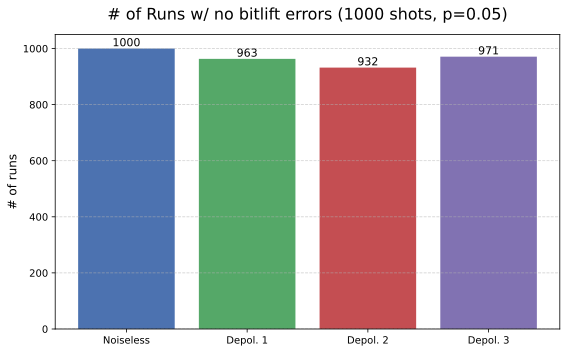

In [ ]:
# Data
labels = ['Noiseless', 'Depol. 1', 'Depol. 2', 'Depol. 3']
values = [noiseless_good, depol_1_good, depol_2_good, depol_3_good]

# Create bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Styling
plt.title(f'# of Runs w/ no bitflip errors ({shots} shots, p={P})', fontsize=16, pad=15)
plt.ylabel('# of runs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()